[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ec9SYrEvja6SNARTBUlO1sXQ5KXQseQi)


Transforming AI Demo Notebook

💡 **Welcome!**

This notebook is a self-contained way to start using widely known Open Source technologies (`transformers`, `gradio`, etc). The core use case is getting familiar with Transformers and building a web application. 
- This notebook can be found at [https://bit.ly/raj_ai](https://bit.ly/raj_ai)
- The accompanying slides are at my github for [huggingface-demos](https://github.com/rajshah4/huggingface-demos/tree/main/FoodApp). 
- A version of the app in spaces, [Indian Food Translator app](https://huggingface.co/spaces/rajistics/Indian_food_translator).


In [1]:
!pip install --quiet transformers
!pip install --quiet gradio
!pip install --quiet datasets
!pip install --quiet sentence-transformers
import os

     |████████████████████████████████| 5.5 MB 7.9 MB/s 
     |████████████████████████████████| 163 kB 45.7 MB/s 
     |████████████████████████████████| 7.6 MB 42.6 MB/s 
     |████████████████████████████████| 11.6 MB 8.0 MB/s 
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 212 kB 56.1 MB/s 
     |████████████████████████████████| 106 kB 59.6 MB/s 
     |████████████████████████████████| 272 kB 57.3 MB/s 
     |████████████████████████████████| 2.3 MB 36.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 6.7 MB/s 
     |████████████████████████████████| 68 kB 6.2 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |███████████████████████████

# Tutorial: Transformative AI

**Learning goals:** The goal of this tutorial is to learn How To

1. Use pre-trained pipelines and models across many use cases
2. Introduce web demos
3. How to get free inference

**Duration**: 45 minutes

**Prerequisites:** Knowledge of Python and basic familiarity with machine learning 

**Author**: [Rajiv Shah](https://twitter.com/rajistics) (feel free to ping me with any questions about this tutorial) 

All of these steps can be done for free! All you need is an Internet browser and a place where you can write Python 👩‍💻

#Exploring Tasks at Hugging Face Hub on the Web:
[Hugging Face Tasks](https://hf.co/tasks) 

---

[Automated Speech Recognition](https://huggingface.co/tasks/automatic-speech-recognition)

[Object Detection](https://huggingface.co/tasks/object-detection)

[Summarization](https://huggingface.co/tasks/summarization)


#Pre-Trained Models with Pipelines -> ✨ Easy Mode ✨

The [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) supports many 20+ common tasks out-of-the-box:

**Text**:
* Sentiment analysis: classify the polarity of a given text.
* Text generation (in English): generate text from a given input.
* Name entity recognition (NER): label each word with the entity it represents (person, date, location, etc.).
* Question answering: extract the answer from the context, given some context and a question.

**Image**:
* Image classification: classify an image.
* Image segmentation: classify every pixel in an image.
* Object detection: detect objects within an image.

**Audio**:
* Audio classification: assign a label to a given segment of audio.
* Automatic speech recognition (ASR): transcribe audio data into text.

**MultiModal**:
* Visual Question Answering: answers open-ended questions about images
* Image To Text: predicts a caption for a given image

###Text

Sentiment Analysis

In [16]:
from transformers import pipeline
sent_classifier = pipeline("sentiment-analysis")
sent_classifier("I am elated about the way something happened")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9994366765022278}]

Text Generation

In [17]:
generator = pipeline("text-generation")
generator("In this course, we will teach you how to")
#generator("Once upon a time,")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': 'In this course, we will teach you how to use CSPAN to connect your domain to a virtual cloud using your local hosting, and demonstrate several techniques.\n\nCSPAN Virtual Cloud\n\nThe Virtual Cloud is an application that makes it'}]

###Image

In [18]:
vision_classifier = pipeline(task="image-classification")
imagepic="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
result = vision_classifier(
    images=imagepic
)
print("\n".join([f"Class {d['label']} with score {round(d['score'], 4)}" for d in result]))

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Class lynx, catamount with score 0.4403
Class cougar, puma, catamount, mountain lion, painter, panther, Felis concolor with score 0.0343
Class snow leopard, ounce, Panthera uncia with score 0.0321
Class Egyptian cat with score 0.0235
Class tiger cat with score 0.023


### MultiModal

In [19]:
from transformers import AutoModelForVisualQuestionAnswering
vqa_pipeline = pipeline("visual-question-answering")
vqa = vqa_pipeline(image=imagepic,
                   question = "What is the weather like")
vqa

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision 4355f59 (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.9079469442367554, 'answer': 'snowy'},
 {'score': 0.8918488621711731, 'answer': 'cold'},
 {'score': 0.17045722901821136, 'answer': 'snow'},
 {'score': 0.16651824116706848, 'answer': 'snowing'},
 {'score': 0.10901936143636703, 'answer': 'winter'}]

#Embeddings

### Images using [Distilled data-efficient Image Transformer (DeiT)](https://huggingface.co/facebook/deit-base-distilled-patch16-224)

In [6]:
from PIL import Image
import requests
im = Image.open(requests.get(imagepic, stream=True).raw)

In [7]:
from transformers import AutoFeatureExtractor
feature_extractor = AutoFeatureExtractor.from_pretrained('facebook/deit-base-distilled-patch16-224')
embeddings = feature_extractor(images=im, return_tensors="pt")
embeddings


Downloading:   0%|          | 0.00/287 [00:00<?, ?B/s]

{'pixel_values': tensor([[[[-1.9980, -2.0665, -2.1008,  ...,  0.8618,  0.4166, -0.2513],
          [-1.9638, -2.0665, -2.1179,  ...,  0.8618,  0.3994, -0.2513],
          [-2.0665, -2.1008, -2.1008,  ...,  0.8789,  0.3652, -0.3541],
          ...,
          [ 1.7523,  1.6667,  1.6667,  ...,  1.5639,  1.5639,  1.5297],
          [ 1.7523,  1.7180,  1.7009,  ...,  1.5297,  1.5468,  1.5297],
          [ 1.7523,  1.7694,  1.7523,  ...,  1.5297,  1.5297,  1.4954]],

         [[-1.9832, -1.9832, -2.0182,  ...,  1.0105,  0.5553, -0.1625],
          [-1.9482, -2.0007, -2.0357,  ...,  1.0105,  0.5378, -0.1450],
          [-2.0007, -2.0357, -2.0357,  ...,  1.0455,  0.5203, -0.2150],
          ...,
          [ 2.0259,  1.9384,  1.9384,  ...,  1.8508,  1.8508,  1.8158],
          [ 2.0434,  1.9909,  1.9734,  ...,  1.8158,  1.8333,  1.7983],
          [ 2.0784,  2.0434,  2.0084,  ...,  1.8158,  1.8158,  1.7633]],

         [[-1.6302, -1.7522, -1.7696,  ...,  1.2631,  0.8099,  0.0431],
          [-1

### Text Embeddings using Sentence Transformers

In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
sentence = ['This framework generates embeddings for each input sentence']
embedding = model.encode(sentence)
embedding.shape

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

(1, 384)

In [20]:
embedding

array([[-1.76214486e-01,  1.20601304e-01, -2.93623894e-01,
        -2.29858026e-01, -8.22924525e-02,  2.37709209e-01,
         3.39985341e-01, -7.80964255e-01,  1.18127584e-01,
         1.63374022e-01, -1.37715220e-01,  2.40282759e-01,
         4.25125480e-01,  1.72417939e-01,  1.05279617e-01,
         5.18164039e-01,  6.22218251e-02,  3.99285853e-01,
        -1.81652248e-01, -5.85578680e-01,  4.49720621e-02,
        -1.72750443e-01, -2.68443614e-01, -1.47386149e-01,
        -1.89218059e-01,  1.92150727e-01, -3.83842587e-01,
        -3.96006942e-01,  4.30648863e-01, -3.15320075e-01,
         3.65949571e-01,  6.05159812e-02,  3.57325882e-01,
         1.59736335e-01, -3.00984085e-01,  2.63250232e-01,
        -3.94311368e-01,  1.84855565e-01, -3.99548978e-01,
        -2.67889708e-01, -5.45117438e-01, -3.13406661e-02,
        -4.30644065e-01,  1.33278146e-01, -1.74794018e-01,
        -4.35465515e-01, -4.77379322e-01,  7.12556168e-02,
        -7.36999512e-02,  5.69136977e-01, -2.82579839e-0

# Fine Tuned Pretrained Models from the 🤗 Hub

Their are thousands of models available that are trained for specific tasks. You can also [fine tune](https://huggingface.co/docs/transformers/training) pre-trained models on your own data to solve your particular tasks. If you need to do distributed traning, the [Accelerate](https://huggingface.co/docs/transformers/accelerate) library makes that easier.

### Identify Forward Looking Statements by Fine Turning FinBERT

[FinBERT-FLS](https://huggingface.co/yiyanghkust/finbert-fls) is model developed for identifying Forward-looking statements (FLS). These statements inform investors of managers’ beliefs and opinions about firm's future events or results. Identifying forward-looking statements from corporate reports can assist investors in financial analysis. FinBERT-FLS is a FinBERT model fine-tuned on 3,500 manually annotated sentences from Management Discussion and Analysis section of annual reports of Russell 3000 firms.

In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-fls")

model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-fls")
nlp = pipeline("text-classification", model=model, tokenizer=tokenizer)
results = nlp('We expect the age of our fleet to enhance availability and reliability due to reduced downtime for repairs. ')
print(results) 

[{'label': 'Specific FLS', 'score': 0.7727875709533691}]


### Fine Tuning Vision Transformer for Indian Food Image Classification

[Indian Food Detector](https://huggingface.co/rajistics/finetuned-indian-food) is a pretrained model available at the Hugging Face hub we will use in this notebook.  

It was fined tuned using the [indian food dataset](https://huggingface.co/datasets/rajistics/indian_food_images). You can find the [fine-tuning notebook here](https://github.com/rajshah4/huggingface-demos/blob/main/FoodApp/Indian_food_image_classification_fine-tuning.ipynb), there is also a [video walkthrough](https://www.youtube.com/watch?v=ahgB8c_TgA8&ab_channel=Rajistics-datascience%2CAI%2Candmachinelearning) on youtube.  

In [24]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
extractor = AutoFeatureExtractor.from_pretrained("rajistics/finetuned-indian-food")
model = AutoModelForImageClassification.from_pretrained("rajistics/finetuned-indian-food")

In [23]:
#let's get an image to test with
from datasets import load_dataset
dataset = load_dataset("rajistics/indian_food_images",split='test[:5%]')

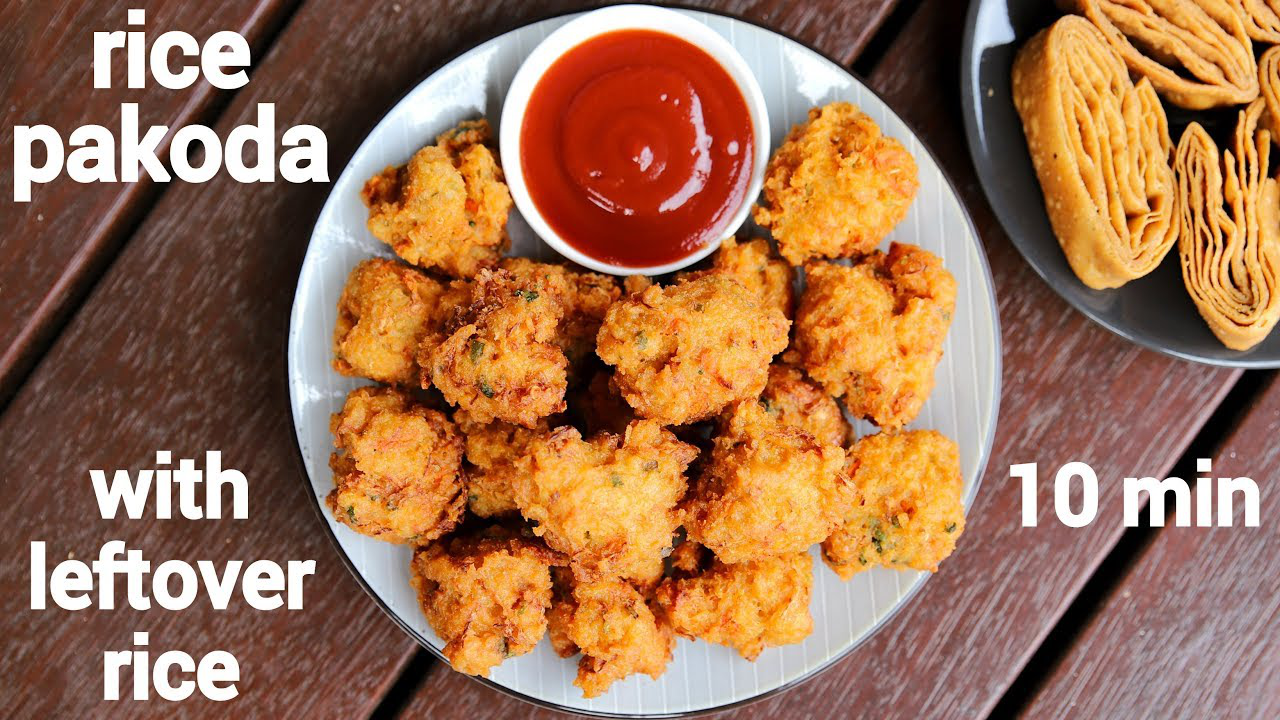

In [25]:
imagepic = dataset['image'][0]
imagepic

In [26]:
#from PIL import Image
inputs = extractor(images=imagepic, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: pakode


### Fine Tune Sentence Transformers with [SetFit](https://github.com/huggingface/setfit). 
I have a [blog post](http://projects.rajivshah.com/blog/2022/10/27/setfit/), [notebook](https://bit.ly/raj_setfit), and [video walkthrough](https://youtu.be/Pg-smN4fUy0) of few shot learning for fine tuning a sentence transformer for text classification.

# Web Demos

**Demos** of machine learning models are an increasingly important part of machine learning. Demos allow:

* model developers to easily **present** their work to a wide audience
* increase **reproducibility** of machine learning research
* diverse users to more easily **identify and debug** failure points of models


Some of my favorite spaces include:
- Document AI: [DocQuery](https://huggingface.co/spaces/impira/docquery). 
- Q/A: [Wikipedia-Assistant](https://huggingface.co/spaces/deepset/wikipedia-assistant). 
- Tabular: [Pypi Forecasting](https://huggingface.co/spaces/rajistics/library_metrics_forecasting)
- Multimodal: [Stable Diffusion](https://huggingface.co/spaces/stabilityai/stable-diffusion)
- Multimodal: [Indian Food Translator](https://huggingface.co/spaces/rajistics/Indian_food_translator)


### Gradio

`gradio` is a handy Python library that lets you build web demos simply by specifying the list of input and output **components** expected by your machine learning model. It's really become the defacto way to quickly show off your ML model. 

For more detail [see the docs](https://gradio.app/docs/)


In [14]:
import gradio as gr
def greet(name):
    return "Hello " + name + "!!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://6f2036f623f7dad9.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f20fed89e50>,
 'http://127.0.0.1:7860/',
 'https://6f2036f623f7dad9.gradio.app')

## 2. Host the Demo (for free) on Hugging Face Spaces

Once you made a Gradio demo, you can host it permanently on Hugging Spaces very easily:

Here are the steps to that (shown in the GIF below):

A. First, create a Hugging Face account if you do not already have one, by visiting https://huggingface.co/ and clicking "Sign Up"

B. Once you are logged in, click on your profile picture and then click on "New Space" underneath it to get to this page: https://huggingface.co/new-space

C. Give your Space a name and a license. Select "Gradio" as the Space SDK, and then choose "Public" if you are fine with everyone accessing your Space and the underlying code

D. Then you will find a page that provides you instructions on how to upload your files into the Git repository for that Space. You may also need to add a `requirements.txt` file to specify any Python package dependencies.

E. Once you have pushed your files, that's it! Spaces will automatically build your Gradio demo allowing you to share it with anyone, anywhere!

![GIF](https://huggingface.co/blog/assets/28_gradio-spaces/spaces-demo-finalized.gif)





# Inference, Predictions, and Scoring

Hugging Face offers several inference solutions that range from open source, free offerings, and paid offerings. 

- [Optimum](https://huggingface.co/docs/optimum/index) - Open source package focused on providing performance optimization tools, like ONNX, to train and run models with maximum efficiency.
- [Inference API](https://huggingface.co/inference-api) - Free Experimental use  

- [Inference Endpoints](https://huggingface.co/docs/inference-endpoints) - Paid and designed for production use 

- [Inference Endpoints for AzureML](https://azuremarketplace.microsoft.com/en-us/marketplace/apps/huggingfaceinc1651727610968.huggingface) - Endpoints running withing Azure ML, check out the [blog post](https://huggingface.co/blog/hugging-face-endpoints-on-azure)

![](https://i.postimg.cc/VNCGbKGn/Screen-Shot-2022-10-19-at-9-15-23-PM.png)

## Optimum

Optimum also provides inference optimizations towards various frameworks and platforms. Optimum enables the usage of popular compression techniques such as quantization and pruning by supporting ONNX Runtime along with Intel Neural Compressor.

🤗 Optimum aims at providing more diversity towards the kind of hardware users can target to train and finetune their models.

To achieve this, we are collaborating with the following hardware manufacturers in order to provide the best transformers integration:

- Graphcore IPUs - IPUs are a completely new kind of massively parallel processor to accelerate machine intelligence. More information here.
- Habana Gaudi Processor (HPU) - HPUs are designed to maximize training throughput and efficiency. More information here.
- Intel - Enabling the usage of Intel tools to accelerate end-to-end pipelines on Intel architectures. More information about Neural Compressor and OpenVINO.

## Inference API from Hugging Face

For experimental use, you can use the Hugging Face [inference API](https://huggingface.co/inference-api) for free to get predictions via simple API calls.  A snipet is available when you click on Inference API on the hub.

In [15]:
# Example Snippet for Inference API
import requests

API_URL = "https://api-inference.huggingface.co/models/yiyanghkust/finbert-fls"
headers = {"Authorization": "Bearer {API_TOKEN}"}   ###Add your API Key here after Bearer

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
output = query({
	"inputs": "In the past, the age of our fleet to enhance availability and reliability due to reduced downtime for repairs.",
})

## Inference Endpoints from Hugging Face
Here is a code snippet for using [Inference Endpoints](https://huggingface.co/docs/inference-endpoints/index) for Deployment

```
import requests

headers = {
    'Authorization': 'Bearer ##add your info##',
    'Content-Type': 'image/jpeg',
}

with requests.get('https://huggingface.co/rajistics/finetuned-indian-food/resolve/main/003.jpg', stream=True).raw as f:
    data = f.read()

response = requests.post('https://tapqm2xbx4yo4etm.us-east-1.aws.endpoints.huggingface.cloud', headers=headers, data=data)
```